In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing data 
df = pd.read_excel("data.xlsx")

In [3]:
df.head()

,PrCode,RespSex,Age,Education,Current_Enrollment,Employment_Status,Work_done,Weight
0,6111400815,2,42,12,1,1,1,1487
1,6111400815,2,39,5,1,3,2,1487
2,6111400815,2,17,6,7,3,2,1487
3,6111400815,2,15,5,6,3,2,1487
4,6111400815,2,12,4,5,3,2,1487


# 1. ETL

In [4]:
df['Province'] = df['PrCode'].astype(str).str[0].astype(int)

df['Location_type'] = df['PrCode'].astype(str).str[3].astype(int)

print(df.shape)

(180635, 10)


In [5]:
df.head()

,PrCode,RespSex,Age,Education,Current_Enrollment,Employment_Status,Work_done,Weight,Province,Location_type
0,6111400815,2,42,12,1,1,1,1487,6,1
1,6111400815,2,39,5,1,3,2,1487,6,1
2,6111400815,2,17,6,7,3,2,1487,6,1
3,6111400815,2,15,5,6,3,2,1487,6,1
4,6111400815,2,12,4,5,3,2,1487,6,1


In [6]:
df.RespSex.value_counts()

1    133864
2     46771
Name: RespSex, dtype: int64

In [7]:
df.Province.value_counts()

2    81750
3    42130
1    33403
4    21994
6     1358
Name: Province, dtype: int64

## 1.1 Youth Dataframe

In [8]:
#Youth df

youth_df = df[(df['Age'] >= 15) & (df['Age'] <= 24)]

In [9]:
print(youth_df.shape)

(48383, 10)


In [10]:
youth_df['Inactive'] = ((youth_df['Current_Enrollment'] == 1) & (youth_df['Employment_Status'] == 3) & (youth_df['Work_done'] ==2)).astype(int)

C:\Users\Humza\AppData\Local\Temp\ipykernel_10968\688383885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_df['Inactive'] = ((youth_df['Current_Enrollment'] == 1) & (youth_df['Employment_Status'] == 3) & (youth_df['Work_done'] ==2)).astype(int)


In [11]:
youth_df.head()

,PrCode,RespSex,Age,Education,Current_Enrollment,Employment_Status,Work_done,Weight,Province,Location_type,Inactive
2,6111400815,2,17,6,7,3,2,1487,6,1,0
3,6111400815,2,15,5,6,3,2,1487,6,1,0
11,6111400811,1,22,6,1,1,1,1487,6,1,0
13,6111400810,1,24,6,1,1,1,1487,6,1,0
14,6111400810,1,17,6,7,3,2,1487,6,1,0


In [13]:
youth_df.drop('PrCode', axis=1, inplace=True)

C:\Users\Humza\AppData\Local\Temp\ipykernel_10968\1282141457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_df.drop('PrCode', axis=1, inplace=True)


In [14]:
youth_df.RespSex.value_counts()

1    36209
2    12174
Name: RespSex, dtype: int64

In [17]:
counts = youth_df.groupby(['Province', 'RespSex']).size()

counts_df = counts.unstack('RespSex')

counts_df = counts_df.rename(columns={1: 'Male', 2: 'Female'})

counts_df

RespSex,Male,Female
Province,,
1,7751,2017
2,13774,8293
3,9298,1547
4,5211,172
6,175,145


In [15]:
youth_df.Education.value_counts()

1     13700
5     10013
6      9371
4      7139
7      4672
12     1434
3      1395
13      380
8       108
2        77
10       46
9        23
14       13
11       11
15        1
Name: Education, dtype: int64

# 2. Table


## 2.1 Province Table

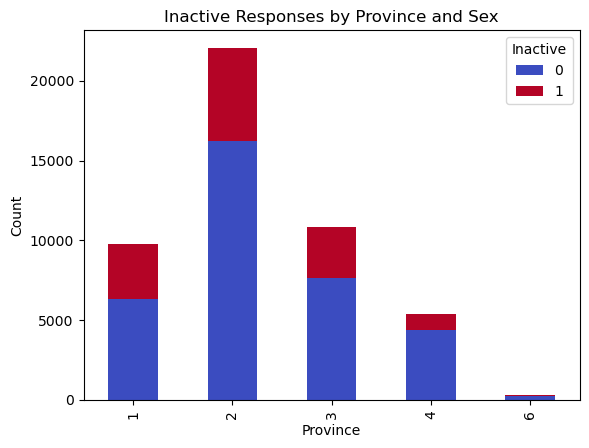

In [13]:
# group by province and inactive status, and count the number of responses
grouped = youth_df.groupby(['Province', 'Inactive'])['RespSex'].count().unstack()

# plot a stacked bar chart
grouped.plot(kind='bar', stacked=True, colormap='coolwarm')

# add axis labels and title
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Inactive Responses by Province and Sex')

# display the chart
plt.show()

In [14]:
# Create a dictionary to map province codes to names
province_names = {1: 'KPK',
                  2: 'Punjab',
                  3: 'Sindh',
                  4: 'Balochistan',
                  6: 'Islamabad'}

# Subset the dataframe to include only relevant columns and rows
subset_df = youth_df[['Province', 'Employment_Status', 'Current_Enrollment', 'Inactive']].copy()
subset_df = subset_df[subset_df['Province'].isin(province_names.keys())]

# Map province codes to province names
subset_df['Province'] = subset_df['Province'].map(province_names)

# Calculate the required values for each province
unemployed = subset_df[subset_df['Employment_Status'] == 2].groupby('Province').size().reset_index(name='Unemployed')
employed = subset_df[subset_df['Employment_Status'] == 1].groupby('Province').size().reset_index(name='Employed')
students = subset_df[subset_df['Current_Enrollment'] != 1].groupby('Province').size().reset_index(name='Students')
inactive = subset_df[subset_df['Inactive'] == 1].groupby('Province').size().reset_index(name='Inactive')

# Merge the results into a single dataframe
province_df = pd.merge(unemployed, employed, on='Province', how='outer')
province_df = pd.merge(province_df, students, on='Province', how='outer')
province_df = pd.merge(province_df, inactive, on='Province', how='outer')


# Calculate the total
province_df['Total'] = province_df['Unemployed'] + province_df['Employed'] + province_df['Students'] + province_df['Inactive']

# Calculate the percentage for each category
province_df['Unemployed(%)'] = round(province_df['Unemployed'] / province_df['Total'] * 100 ,1)
province_df['Employed(%)'] = round(province_df['Employed'] / province_df['Total'] * 100 ,1)
province_df['Students(%)'] = round(province_df['Students'] / province_df['Total'] * 100 ,1)
province_df['Inactive(%)'] = round(province_df['Inactive'] / province_df['Total'] * 100 ,1)

#Display Table
province_df

#Saving table
#province_df.to_excel('Inactive Youth by province.xlsx', index =False)

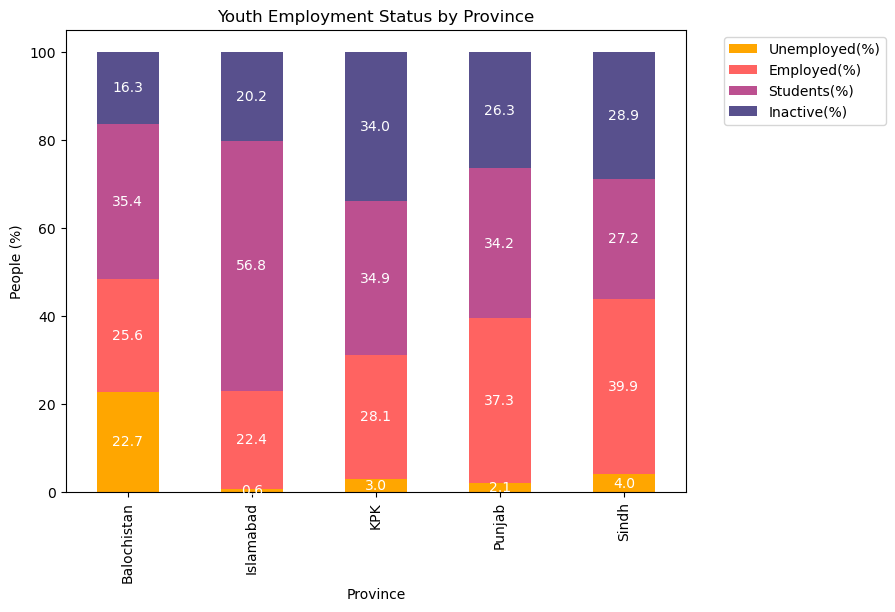

In [15]:
# Define the color scheme
colors = ['#ffa600', '#ff6361', '#bc5090', '#58508d']

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(8, 6))
province_df[['Unemployed(%)', 'Employed(%)', 'Students(%)', 'Inactive(%)']].plot(kind='bar', stacked=True, color=colors, ax=ax)

# Set the title and axis labels
ax.set_title('Youth Employment Status by Province')
ax.set_xlabel('Province')
ax.set_ylabel('People (%)')

# Set the x-axis labels to the Province names from the Province column
ax.set_xticklabels(province_df['Province'])

# Add text labels for each bar segment
for i, row in province_df.iterrows():
    for j, value in enumerate(row[['Unemployed(%)', 'Employed(%)', 'Students(%)', 'Inactive(%)']]):
        ax.text(i, sum(row[['Unemployed(%)', 'Employed(%)', 'Students(%)', 'Inactive(%)']][:j+1])-value/2, str(value), color='white', fontsize=10, ha='center', va='center')

# Move the legend outside the plot area and adjust its position
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

fig.savefig('Youth Employment Status.png', dpi=600, bbox_inches='tight')


## 2.2 Distribution of inactive youth by sex and by area of residence.

In [23]:
# Subset the dataframe to include only relevant columns and rows
loc_df = youth_df[['Province', 'RespSex', 'Age', 'Location_type', 'Inactive']].copy()

loc_df = loc_df[loc_df['Inactive'] == 1]

loc_df = loc_df[loc_df['Province'].isin(province_names.keys())]

#Mapping
loc_df['Province'] = loc_df['Province'].map(province_names)

# Calculate the required values for each province
male = loc_df[loc_df['RespSex'] == 1].groupby('Province').size().reset_index(name= 'Male')
female = loc_df[loc_df['RespSex'] == 2].groupby("Province").size().reset_index(name= 'Female')

rural = loc_df[loc_df['Location_type'] == 1].groupby("Province").size().reset_index(name= 'Rural')
urban = loc_df[loc_df['Location_type'] == 2].groupby("Province").size().reset_index(name= 'Urban')

# Merge the results into a single dataframe
sr_df = pd.merge(male, female, on='Province', how ='outer')
sr_df = pd.merge(sr_df, rural, on='Province', how ='outer')
sr_df = pd.merge(sr_df, urban, on='Province', how ='outer')

# Calculate the percentage for each category
sr_df['Male(%)'] = round(sr_df['Male']/(sr_df['Male'] +(sr_df['Female'])) * 100 ,1)
sr_df['Female(%)'] = round(sr_df['Female']/(sr_df['Male'] +(sr_df['Female'])) * 100 ,1)

sr_df['Rural(%)'] = round(sr_df['Rural']/(sr_df['Rural'] +(sr_df['Urban'])) * 100 ,1)
sr_df['Urban(%)'] = round(sr_df['Urban']/(sr_df['Rural'] +(sr_df['Urban'])) * 100 ,1)


#Display Table
sr_df

#Saving Table
#sr_df.to_excel("Table 2 - Distribution by province.xlsx", index=False)

,Province,Male,Female,Rural,Urban,Male(%),Female(%),Rural(%),Urban(%)
0,Balochistan,949,38,533,454,96.1,3.9,54.0,46.0
1,Islamabad,38,27,21,44,58.5,41.5,32.3,67.7
2,KPK,2689,732,2119,1302,78.6,21.4,61.9,38.1
3,Punjab,3474,2384,3718,2140,59.3,40.7,63.5,36.5
4,Sindh,2756,427,2587,596,86.6,13.4,81.3,18.7


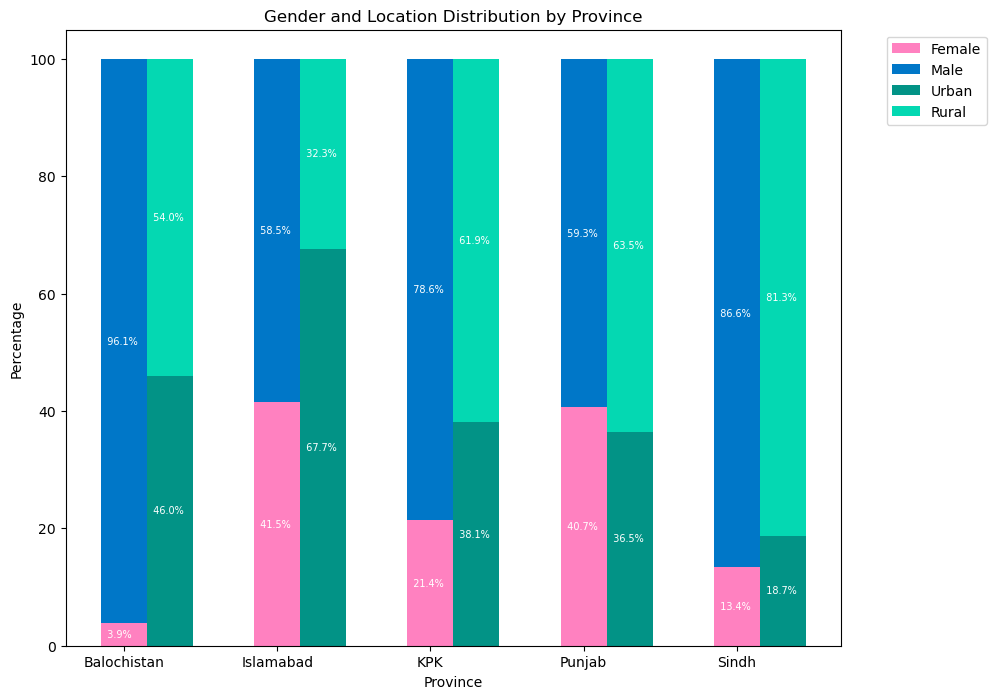

In [17]:
# Define the color scheme
lc = ['#04d8b2', '#029386']
gc = ['#0077c8', '#ff81c0']

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Define the width of each bar
bar_width = 0.3

# Create the stacked bar plot for gender
ax.bar(sr_df.index, sr_df['Female(%)'], color=gc[1], width=bar_width, label='Female')
ax.bar(sr_df.index, sr_df['Male(%)'], bottom=sr_df['Female(%)'], color=gc[0], width=bar_width, label='Male')

# Create the stacked bar plot for location
ax.bar(sr_df.index + bar_width, sr_df['Urban(%)'], color=lc[1], width=bar_width, label='Urban')
ax.bar(sr_df.index + bar_width, sr_df['Rural(%)'], bottom=sr_df['Urban(%)'], color=lc[0], width=bar_width, label='Rural')

# Set the title and axis labels
ax.set_title('Gender and Location Distribution by Province')
ax.set_xlabel('Province')
ax.set_ylabel('Percentage')

ax.set_xticks(range(len(sr_df)))
ax.set_xticklabels(sr_df['Province'], ha='center')

# Set the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add the values to the center of each region
for i, (index, row) in enumerate(sr_df.iterrows()):
    ax.text(i - bar_width/2, row['Female(%)']/2, f"  {row['Female(%)']}%", va='center', color='white', fontsize=7)
    ax.text(i - bar_width/2, row['Female(%)'] + row['Male(%)']/2, f"  {row['Male(%)']}%", va='center', color='white', fontsize=7)
    ax.text(i + bar_width/2, row['Urban(%)']/2, f"  {row['Urban(%)']}%", va='center', color='white', fontsize=7)
    ax.text(i + bar_width/2, row['Urban(%)'] + row['Rural(%)']/2, f"  {row['Rural(%)']}%", va='center', color='white', fontsize=7)

# Show the plot
plt.show()


fig.savefig('Fig 2 - gender_location_distribution.png', dpi=600, bbox_inches='tight')

# Table 3: Ever Attended School

In [22]:
#Ever attended School
youth_df['Ever_Attended_School'] = youth_df['Education'].apply(lambda x: 0 if x==1 else 1)

# filter the data based on the conditions and count the values
yes_counts = youth_df.loc[(youth_df['Ever_Attended_School'] == 1) & (youth_df['Inactive'] == 1), 'Province'].value_counts()
no_counts = youth_df.loc[(youth_df['Ever_Attended_School'] == 0) & (youth_df['Inactive'] == 1), 'Province'].value_counts()


# create a new dataframe with the counts
df_perc = pd.DataFrame({'Yes': yes_counts, 'No': no_counts})

# replace the province codes with names
df_perc.rename(index=province_names, inplace=True)

# add a new row to show the total counts
df_perc.loc['Total'] = df_perc.sum()

# calculate the percentages
df_perc = df_perc.apply(lambda x: x / x.sum()*100, axis=1)
df_perc = df_perc.round(2)

# display the resulting dataframe
df_perc


#Saving Table

#df_perc.to_excel("Table 3 - Ever Attended School.xlsx")

C:\Users\Humza\AppData\Local\Temp\ipykernel_19024\1875945501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_df['Ever_Attended_School'] = youth_df['Education'].apply(lambda x: 0 if x==1 else 1)


# Table 4: Qualification

In [21]:
# create a new column 'Qualification' based on 'Edu' column
youth_df['Qualification'] = pd.cut(youth_df['Education'], bins=[0,1,5,7,15], 
                              labels=['No Qualification', 'Primary Level','Secondary Level', 'University'])

# filter the data based on the conditions and count the values
counts = youth_df.loc[(youth_df['Inactive'] == 1), ['Province', 'Qualification']]
table = pd.crosstab(counts['Qualification'], counts['Province'])

# replace the province codes with names
table.rename(columns=province_names, inplace=True)

# calculate the percentages
table = table.apply(lambda x: x / x.sum()*100, axis=0)
table = table.round(2)

# display the resulting dataframe
table

#Saving Table
table.to_excel("Table 4 - Qualification.xlsx")

C:\Users\Humza\AppData\Local\Temp\ipykernel_19024\3607311454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youth_df['Qualification'] = pd.cut(youth_df['Education'], bins=[0,1,5,7,15],
